# Wordle Reinforcement Experiments

## Imports and Config

In [1]:
import sys
sys.path.append('../..')

In [2]:
import src.config as src_config
from src.models import qlearn, sarsa

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Config Changes

In [4]:
epsilon = 0.02 #For epsilon greedy learning
gamma = 0.05 #Discount factor
alpha = 0.02 #Learning rate
trials = 100
iters = 20

In [5]:
# Rewards

src_config.WIN_REWARD = 25
src_config.LOSE_REWARD = -15
src_config.GREEN_REWARD = 5
src_config.YELLOW_REWARD = 3
src_config.GREY_REWARD = -1

## Q - Learning

In [6]:
config = {'epsilon': epsilon, 'gamma': gamma, 'alpha': alpha}
model = qlearn.QLearn(config)
# model = sarsa.SARSALearn(config)

In [7]:
train_solves = []
test_solves = []
for i in range(iters):
    model.train(trials)
    updated_q_config = dict(list(config.items()) + list({'Q': model.Q}.items()))
    train_solves.append(len(model.games_solved))
    res = model.test(verbose=False)
    print(f'Games solved: {len(model.games_solved)}/{trials}')
    print(f'Test solved: {i}: {res["solved"]}')
    if(res['solved']):
        test_solves.append(i)

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.17it/s]


Games solved: 31/100
Test solved: 0: False


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:49<00:00,  2.01it/s]


Games solved: 37/100
Test solved: 1: True


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:06<00:00,  1.50it/s]


Games solved: 40/100
Test solved: 2: False


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:59<00:00,  1.69it/s]


Games solved: 50/100
Test solved: 3: False


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:59<00:00,  1.69it/s]


Games solved: 45/100
Test solved: 4: False


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:55<00:00,  1.80it/s]


Games solved: 52/100
Test solved: 5: False


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:27<00:00,  3.63it/s]


Games solved: 41/100
Test solved: 6: True


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  3.45it/s]


Games solved: 47/100
Test solved: 7: False


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.54it/s]


Games solved: 41/100
Test solved: 8: True


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  3.35it/s]


Games solved: 31/100
Test solved: 9: False


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:31<00:00,  3.22it/s]


Games solved: 40/100
Test solved: 10: False


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.03it/s]


Games solved: 48/100
Test solved: 11: True


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  3.00it/s]


Games solved: 44/100
Test solved: 12: True


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  2.95it/s]


Games solved: 33/100
Test solved: 13: True


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.09it/s]


Games solved: 47/100
Test solved: 14: False


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:37<00:00,  2.70it/s]


Games solved: 39/100
Test solved: 15: True


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.89it/s]


Games solved: 42/100
Test solved: 16: True


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  3.03it/s]


Games solved: 53/100
Test solved: 17: False


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  3.00it/s]


Games solved: 38/100
Test solved: 18: True


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.92it/s]


Games solved: 51/100
Test solved: 19: False


Text(0.5, 1.0, 'Test Games solved: 9/20')

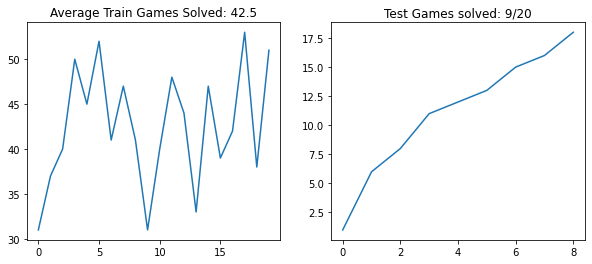

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(list(range(len(train_solves))), train_solves)
axs[0].set_title(f'Average Train Games Solved: {sum(train_solves)/iters}')
axs[1].plot(list(range(len(test_solves))), test_solves)
axs[1].set_title(f'Test Games solved: {len(test_solves)}/{iters}')

In [10]:
q_table = model.Q
actions = pd.DataFrame(columns=['# Green', '# Yellow', 'Game State', 'Action'])
print(f'Q values shape: {q_table.shape}') #Num green, Num yellow, game step, action
q_actions = np.argmax(q_table, axis=3)
for green in range(src_config.WORD_LENGTH):
    for yellow in range(src_config.WORD_LENGTH-green):
        for state in range(src_config.GAME_LENGTH):
            action = model.strategies[q_actions[green, yellow, state]].__class__.__name__[:-8]
            actions = actions.append({'# Green': green, '# Yellow': yellow, 'Game State': state, 'Action': action}, ignore_index=True)
actions.pivot(index=['# Green', '# Yellow'], columns=['Game State'], values=['Action'])
            

Q values shape: (6, 6, 7, 3)


Action                                           \
Game State                0             1          2               3   
# Green # Yellow                                                       
0       0         HighestLL     HighestLL  HighestLL       HighestLL   
        1         HighestLL     HighestLL  HighestLL       HighestLL   
        2         HighestLL  FreshLetters  HighestLL       HighestLL   
        3         HighestLL     HighestLL  HighestLL       HighestLL   
        4         HighestLL     HighestLL  HighestLL       HighestLL   
1       0         HighestLL     HighestLL  HighestLL       HighestLL   
        1         HighestLL     HighestLL  HighestLL       HighestLL   
        2         HighestLL     HighestLL  HighestLL       HighestLL   
        3         HighestLL     HighestLL  HighestLL       HighestLL   
2       0         HighestLL     HighestLL  HighestLL       HighestLL   
        1         HighestLL     HighestLL  HighestLL       HighestLL   
        2         HighestLL     HighestLL  HighestLL  HighestLLSmart   
3       0         HighestLL     HighestLL  HighestLL       HighestLL   
        1         HighestLL     HighestLL  HighestLL       HighestLL   
4       0         HighestLL     HighestLL  HighestLL       HighestLL   

                                                
Game State                   4               5  
# Green # Yellow                                
0       0            HighestLL       HighestLL  
        1            HighestLL       HighestLL  
        2            HighestLL       HighestLL  
        3            HighestLL    FreshLetters  
        4         FreshLetters  HighestLLSmart  
1       0            HighestLL    FreshLetters  
        1            HighestLL    FreshLetters  
        2            HighestLL  HighestLLSmart  
        3            HighestLL  HighestLLSmart  
2       0            HighestLL       HighestLL  
        1            HighestLL    FreshLetters  
        2            HighestLL  HighestLLSmart  
3       0            HighestLL    FreshLetters  
        1            HighestLL  HighestLLSmart  
4       0            HighestLL  HighestLLSmart

In [16]:
model.test()

++++++++++++++++++++++++++++++
Solution: taper
B R A C E 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

++++++++++++++++++++++++++++++
Solution: taper
B R A C E 
B E A N S 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

++++++++++++++++++++++++++++++
Solution: taper
B R A C E 
B E A N S 
K U L F I 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

++++++++++++++++++++++++++++++
Solution: taper
B R A C E 
B E A N S 
K U L F I 
C A R E S 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

++++++++++++++++++++++++++++++
Solution: taper
B R A C E 
B E A N S 
K U L F I 
C A R E S 
R A L E S 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

++++++++++++++++++++++++++++++
Solution: taper
B R A C E 
B E A N S 
K U L F I 
C A R E S 
R A L E S 
S A N E R 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

{'solved': False}
